# Image Transforms Demo

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eeuwevandijk/computer-vision-with-embedded-machine-learning/blob/master/Data%20Augmentation/image_transforms_demo.ipynb)


Original notebook can be found at: https://github.com/ShawnHymel/computer-vision-with-embedded-machine-learning 


Run this notebook to see some common image transforms that can be used to create an augmented dataset.

Upload an image (e.g. "jack_0022.bmp") and set `IMG_PATH` to the location of that image.

Author: Eeuwe van Dijk<br>
Date: March 11, 2022<br>
License: [Apache-2.0](apache.org/licenses/LICENSE-2.0)<br>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL

import skimage.transform
import skimage.util

In [41]:
### Settings

# Location of image
IMG_PATH = "/content/jack/jack_0022.bmp"

# You are welcome to change the seed to get different augmentation effects
SEED = 42
random.seed(SEED)

In [42]:
### Load image as Numpy array

# Open image
img = PIL.Image.open(IMG_PATH)

# Convert the image to a Numpy array, optionally invert, and append to X
img = np.asarray(img)

In [43]:
### Get height and width of image
height = img.shape[0]
width = img.shape[1]

(96, 96, 3)
First channel:
[[180 180 189 ... 222 213 222]
 [197 189 197 ... 213 213 222]
 [197 197 189 ... 213 222 222]
 ...
 [189 197 189 ... 230 222 222]
 [189 197 189 ... 222 222 222]
 [189 189 189 ... 222 222 222]]


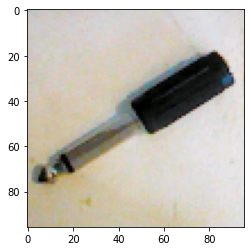

In [44]:
### View the image

# Print part of image
print(img.shape)
print("First channel:")
print(img[:,:,0])

# Display image from array
plt.imshow(img, vmin=0, vmax=255)

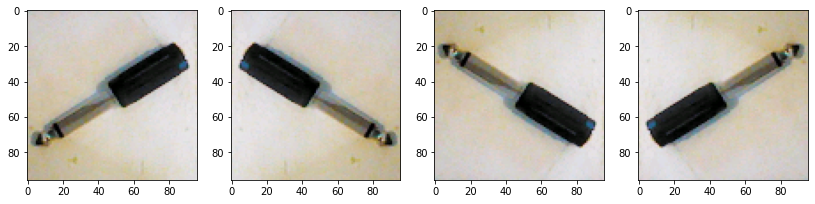

In [45]:
### Flip 

# Create three separate flips
flip_1 = np.fliplr(img)
flip_2 = np.flipud(img)
flip_3 = np.flipud(np.fliplr(img))

# Show the original and the transforms
figs, axs = plt.subplots(1, 4, figsize=(14, 14))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(flip_1, vmin=0, vmax=255)
axs[2].imshow(flip_2, vmin=0, vmax=255)
axs[3].imshow(flip_3, vmin=0, vmax=255)

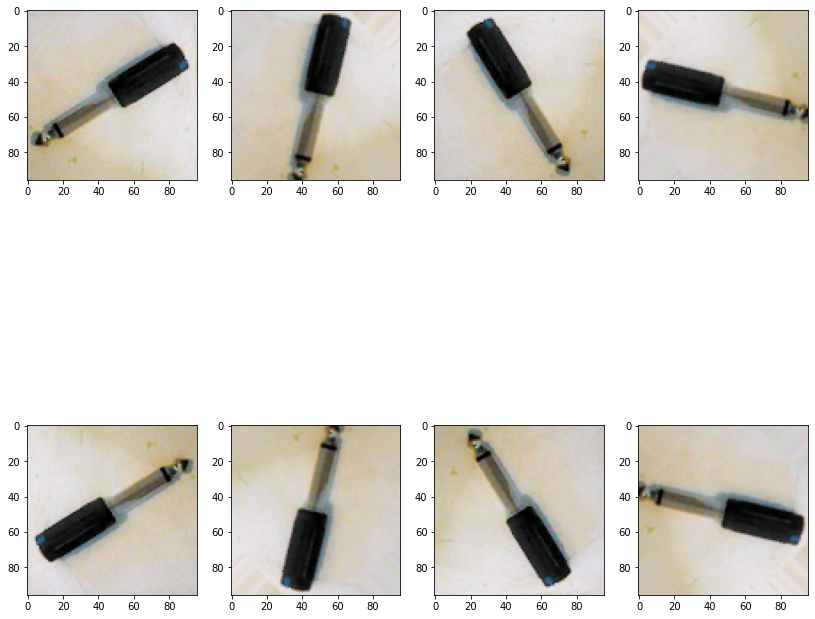

In [53]:
### Rotate

# Create 7 rotations at the 45, 90, 135,... 270
rot_1 = skimage.transform.rotate(img, angle=45, mode='edge', preserve_range=True).astype(np.uint8)
rot_2 = skimage.transform.rotate(img, angle=90, mode='edge', preserve_range=True).astype(np.uint8)
rot_3 = skimage.transform.rotate(img, angle=135, mode='edge', preserve_range=True).astype(np.uint8)
rot_4 = skimage.transform.rotate(img, angle=180, mode='edge', preserve_range=True).astype(np.uint8)
rot_5 = skimage.transform.rotate(img, angle=225, mode='edge', preserve_range=True).astype(np.uint8)
rot_6 = skimage.transform.rotate(img, angle=270, mode='edge', preserve_range=True).astype(np.uint8)
rot_7 = skimage.transform.rotate(img, angle=315, mode='edge', preserve_range=True).astype(np.uint8)

# Show the original and the transforms
figs, axs = plt.subplots(2, 4, figsize=(14, 14))
axs[0,0].imshow(img, vmin=0, vmax=255)
axs[0,1].imshow(rot_1, vmin=0, vmax=255)
axs[0,2].imshow(rot_2, vmin=0, vmax=255)
axs[0,3].imshow(rot_3, vmin=0, vmax=255)
axs[1,0].imshow(rot_4, vmin=0, vmax=255)
axs[1,1].imshow(rot_5, vmin=0, vmax=255)
axs[1,2].imshow(rot_6, vmin=0, vmax=255)
axs[1,3].imshow(rot_7, vmin=0, vmax=255)

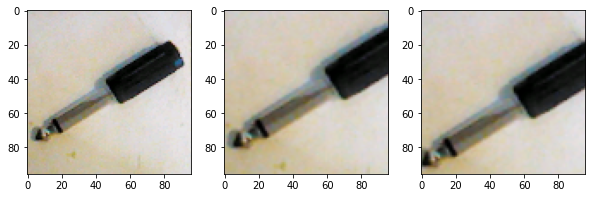

In [36]:
### Scale and randomly crop

# Choose a scale/crop factor (must be >= 1.0)
scale_factor = 1.3

# Create scaled images (e.g. make the image bigger)
img_scaled = skimage.transform.rescale(img, 
                                       scale=scale_factor, 
                                       anti_aliasing=True, 
                                       multichannel=True,
                                       preserve_range=True)

# Make sure new scaled image is also 8-bit integer values
img_scaled = img_scaled.astype(np.uint8)

# Get height and width of scaled image
s_h = img_scaled.shape[0]
s_w = img_scaled.shape[1]

# Randomly choose start of crop point
crop_y = round(random.random() * (s_h - height))
crop_x = round(random.random() * (s_w - width))

# Crop scaled image
scale_1 = img_scaled[crop_y:(crop_y + height), crop_x:(crop_x + width), :]

# Randomly choose a different crop point
crop_y = round(random.random() * (s_h - height))
crop_x = round(random.random() * (s_w - width))

# Crop scaled image
scale_2 = img_scaled[crop_y:(crop_y + height), crop_x:(crop_x + width), :]

# Show the original and the transforms
figs, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(scale_1, vmin=0, vmax=255)
axs[2].imshow(scale_2, vmin=0, vmax=255)

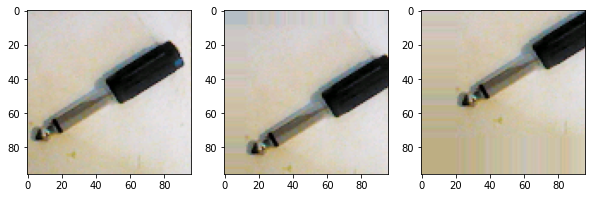

In [37]:
### Translation

# Choose random amount to translate (up to 1/4 image width, height) in either direction
tr_y = round((0.5 - random.random()) * (height / 2))
tr_x = round((0.5 - random.random()) * (width / 2))

# Perform translation to create new image
translation = skimage.transform.AffineTransform(translation=(tr_y, tr_x))
tr_1 = skimage.transform.warp(img, translation, mode='edge', preserve_range=True)
tr_1 = tr_1.astype(np.uint8)

# Choose a new random amount to translate (up to 1/4 image width, height) in either direction
tr_y = round((0.5 - random.random()) * (height / 2))
tr_x = round((0.5 - random.random()) * (width / 2))

# Perform translation to create new image
translation = skimage.transform.AffineTransform(translation=(tr_y, tr_x))
tr_2 = skimage.transform.warp(img, translation, mode='edge', preserve_range=True)
tr_2 = tr_2.astype(np.uint8)

# Show the original and the transforms
figs, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(tr_1, vmin=0, vmax=255)
axs[2].imshow(tr_2, vmin=0, vmax=255)

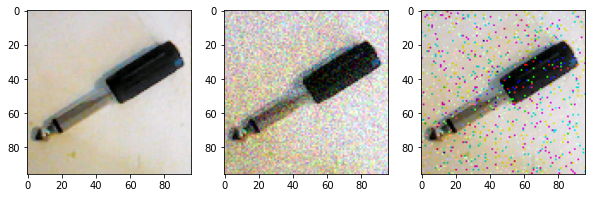

In [38]:
### Noise

# Add random Gaussian noise
noise_1 = skimage.util.random_noise(img, mode='gaussian', seed=SEED)
noise_1 = (noise_1 * 255).astype(np.uint8)

# Add random "salt and pepper" noise
noise_2 = skimage.util.random_noise(img, mode='s&p', seed=SEED)
noise_2 = (noise_2 * 255).astype(np.uint8)

# Show the original and the transforms
figs, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(noise_1, vmin=0, vmax=255)
axs[2].imshow(noise_2, vmin=0, vmax=255)